# **===========================================================================================================================================================** #
# **Incremental Capstone 3** #
# **===========================================================================================================================================================** #

In [501]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import sys

# How to tell python version
#print (sys.version_info)
#print (platform.python_version())

# How to pip install from Terminal window:
# python -m pip install seaborn


In [502]:
print()
print(df_NSME1988_new.describe().T)
print(df_NSME1988_new.info())


                                 count          mean           std      min     25%      50%      75%       max
physician_office_visits         4406.0      5.774399      6.759225      0.0     1.0      4.0      8.0      89.0
nonphysician_office_visits      4406.0      1.618021      5.317056      0.0     0.0      0.0      1.0     104.0
physician_outpatient_visits     4406.0      0.692692      3.451888   -115.0     0.0      0.0      0.0      71.0
nonphysician_outpatient_visits  4406.0      0.477985      3.459950   -101.0     0.0      0.0      0.0     113.0
emergency_room_visits           4406.0      0.263504      0.703659      0.0     0.0      0.0      0.0      12.0
number_of_hospital_stays        4406.0      0.295960      0.746398      0.0     0.0      0.0      0.0       8.0
number_of_chronic_conditions    4406.0      1.541988      1.349632      0.0     1.0      1.0      2.0       8.0
age                             4406.0     74.024058      6.334050     66.0    69.0     73.0     78.0  

## Variable Identification ##

    physician_office_visits         int16	- Numerical Descrete 
    nonphysician_office_visits      int16	- Numerical Descrete  
    physician_outpatient_visits     int16	- Numerical Descrete  
    nonphysician_outpatient_visits  int16	- Numerical Descrete  
    emergency_room_visits           int16	- Numerical Descrete  
    number_of_hospital_stays        int16	- Numerical Descrete  
    overall_health_factor           object  - Categorical Ordinal
    number_of_chronic_conditions    int16	- Numerical Descrete  
    daily_living_activities         object  - Categorical Ordinal
    region                          object  - Categorical Nominal 
    age                             int8	- Numerical  Discrete
    gender                          object  - Categorical Nominal 
    is_married                      bool  	- Categorical Nominal 
    years_of_education              int8	- Numerical Descrete   
    family_income                   int64	- Numerical Continuous 
    is_employed                     bool  	- Categorical Nominal 
    has_health_insurance            bool  	- Categorical Nominal 
    has_medicaid                    bool  	- Categorical Nominal 

    The following are considered Numerical Discrete variables becase they are countable instances of something (number of times you visit office, number of years,..)
        physician_office_visits, nonphysician_office_visits, nonphysician_outpatient_visits, emergency_room_visits, number_of_hospital_stays, years_of_education, age        

    The following are considered Numerical Continuous variables because it has theoretically infinite values and can be measured
        family_income

    The following are Categorical Nominal because they have no inherant order or ranking (one of a group, one or the other, true/false)
        region, gender, is_married, is_employed, has_health_insurance, has_medicaid

    The following are Categorical Ordinal because they can be ranked or ordered (levels of overall_health/daily_activities)
        overall_health_factor, daily_living_activites

    overall_health_factor is really the (dependent variable) (label/role/outcome) that we are trying to predict based on all the other factors.
    We're also trying to determine how relevent the other factors (individually or combined) to overall_health.


## Data Analysis ##
### Univariate Analysis ###

##### Analyzing Number of Visits #####

Number of Columns: 16
Min - Max - Mode Visits
physician_office_visits Min Visits: 0 Max Visits: 89 Mode Visits: 0    0
Name: physician_office_visits, dtype: int16
nonphysician_office_visits Min Visits: 0 Max Visits: 104 Mode Visits: 0    0
Name: nonphysician_office_visits, dtype: int16
physician_outpatient_visits Min Visits: -115 Max Visits: 71 Mode Visits: 0    0
Name: physician_outpatient_visits, dtype: int16
nonphysician_outpatient_visits Min Visits: -101 Max Visits: 113 Mode Visits: 0    0
Name: nonphysician_outpatient_visits, dtype: int16
emergency_room_visits Min Visits: 0 Max Visits: 12 Mode Visits: 0    0
Name: emergency_room_visits, dtype: int16
number_of_hospital_stays Min Visits: 0 Max Visits: 8 Mode Visits: 0    0
Name: number_of_hospital_stays, dtype: int16


Min - Max - Mode Visits - Excluding zero and outliers
physician_office_visits Min Visits: 1 Max Visits: 89 Mode Visits: 0    1
Name: physician_office_visits, dtype: int16
nonphysician_office_visits Min Visits: 1 Max V

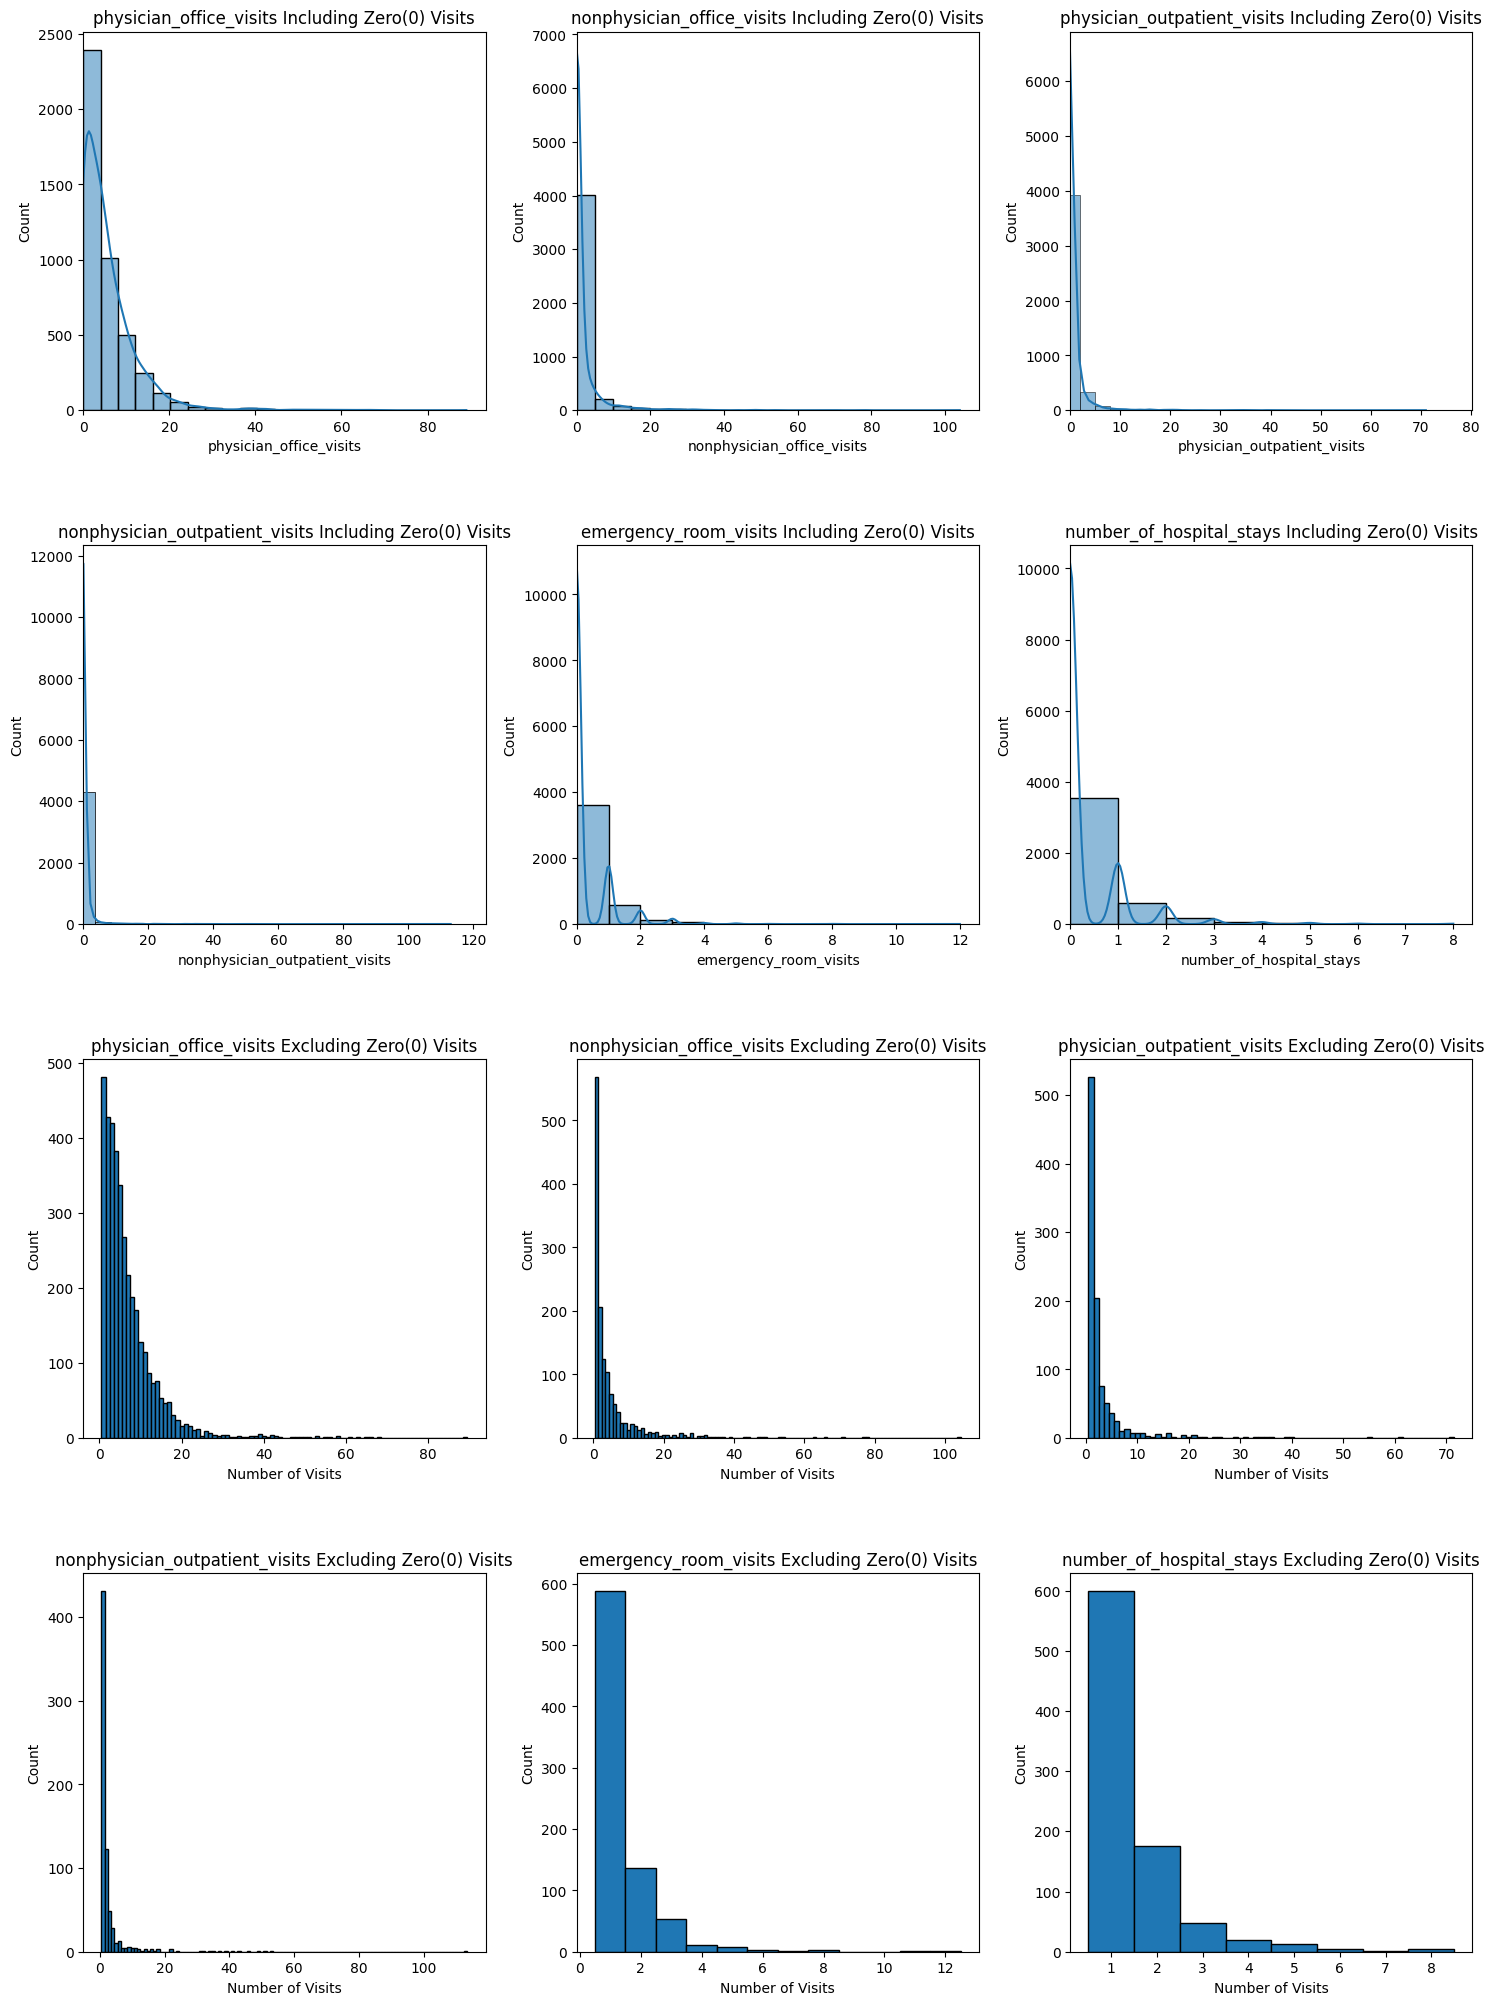

Completed


In [503]:
import matplotlib.scale as mscale

number_of_visit_columns = ['physician_office_visits' ,
                            'nonphysician_office_visits' ,
                            'physician_outpatient_visits' ,
                            'nonphysician_outpatient_visits' ,
                            'emergency_room_visits' ,
                            'number_of_hospital_stays']

n_cols = len(number_of_visit_columns) * 2 + 4
print(f'Number of Columns: {n_cols}')

print('Min - Max - Mode Visits')
for i, col in enumerate(number_of_visit_columns):
    print(f'{col} Min Visits: {df_NSME1988_new[col].min()} Max Visits: {df_NSME1988_new[col].max()} Mode Visits: {df_NSME1988_new[col].mode()}')
print()
print()

print('Min - Max - Mode Visits - Excluding zero and outliers')
for i, col in enumerate(number_of_visit_columns):
    data_gt_zero = df_NSME1988_new[df_NSME1988_new[col] > 0][col]
    print(f'{col} Min Visits: {data_gt_zero.min()} Max Visits: {data_gt_zero.max()} Mode Visits: {data_gt_zero.mode()}')
print()
print()

# I need a 4X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(number_of_visit_columns):
    
    # Initially plots looked weird because of outliers (bad data) and produced less than meaningful results
    # Set x-axis limit to 95th percentile to exclude extreme outliers
    # This only works on visits/number of columns

    max_val = df_NSME1988_new[col].max()
    binwidth = max(1, max_val // 20)  # Divide range into ~20 bins
    sns.histplot(data=df_NSME1988_new, x=col, ax=axes[i], binwidth=binwidth, kde=True)
    axes[i].set_xlim(left=0)
   
    # tried different scaling techniques and results are still weird
    #axes[i].set_yscale('function', functions=(lambda x: x**0.5, lambda x: x**2))
    #axes[i].set_yscale('log')
    # trying binning (above) next; finally binwidt

    axes[i].set_title(f'{col} Including Zero(0) Visits')

# Excluding zeros
for i, col in enumerate(number_of_visit_columns):
    
    # Initially plots looked weird because of outliers (bad data) and produced less than meaningful results
    # Set x-axis limit to 95th percentile to exclude extreme outliers
    # This only works on visits/number of columns
    
    # Filter out zeros
    data_no_zeros = df_NSME1988_new[df_NSME1988_new[col] > 0][col]
    
    max_val = data_no_zeros.max()
    bins = np.arange(0.5, max_val + 1.5, 1)
    
    j = i + 6
    axes[j].hist(data_no_zeros, bins=bins, edgecolor='black')
    axes[j].set_xlabel('Number of Visits')
    axes[j].set_ylabel('Count')

    axes[j].set_title(f'{col} Excluding Zero(0) Visits')    

    
# Hide the blank/empty graphs
for j in range(j + 1, len(axes)):
    axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    
print("Completed")

##### Number of Visits Analysis ####
    All the plots have a strong right (positive) skewed shape
    In most cases zero (0) is the highest number of visits.
    There were also several (negative) outliers which indicates bad data (you can't have -99 visits..)
    I tried to get around this be set the ylimit to account for these.
    I tried different scales/binning techniques to make the plots more readable/interpretable

    Central Mean Tendency - including zero visits

        physician_office_visits Min Visits: 0 Max Visits: 89 Mode Visits: 0    
        nonphysician_office_visits Min Visits: 0 Max Visits: 104 Mode Visits: 0    
        physician_outpatient_visits Min Visits: -115 Max Visits: 71 Mode Visits: 0    
        nonphysician_outpatient_visits Min Visits: -101 Max Visits: 113 Mode Visits: 0    
        emergency_room_visits Min Visits: 0 Max Visits: 12 Mode Visits: 0    
        number_of_hospital_stays Min Visits: 0 Max Visits: 8 Mode Visits: 0    

    Central Mean Tendency - excluding zero visits
    (I thought it would be interesting examine these values excluding values <=0 - Excluding 0 and negative outliers)
        physician_office_visits Min Visits: 1 Max Visits: 89 Mode Visits: 1
        nonphysician_office_visits Min Visits: 1 Max Visits: 104 Mode Visits: 1
        physician_outpatient_visits Min Visits: 1 Max Visits: 71 Mode Visits: 1
        nonphysician_outpatient_visits Min Visits: 1 Max Visits: 113 Mode Visits: 1
        emergency_room_visits Min Visits: 1 Max Visits: 12 Mode Visits: 1
        number_of_hospital_stays Min Visits: 1 Max Visits: 8 Mode Visits: 1

    Based on this, clearly the lower occurring number of visits are dominant in this data set.
    As the number if visits increases, number of instances of visits decreases (inverse relationship)

##### Additional Analysis #####

Number of Columns: 8


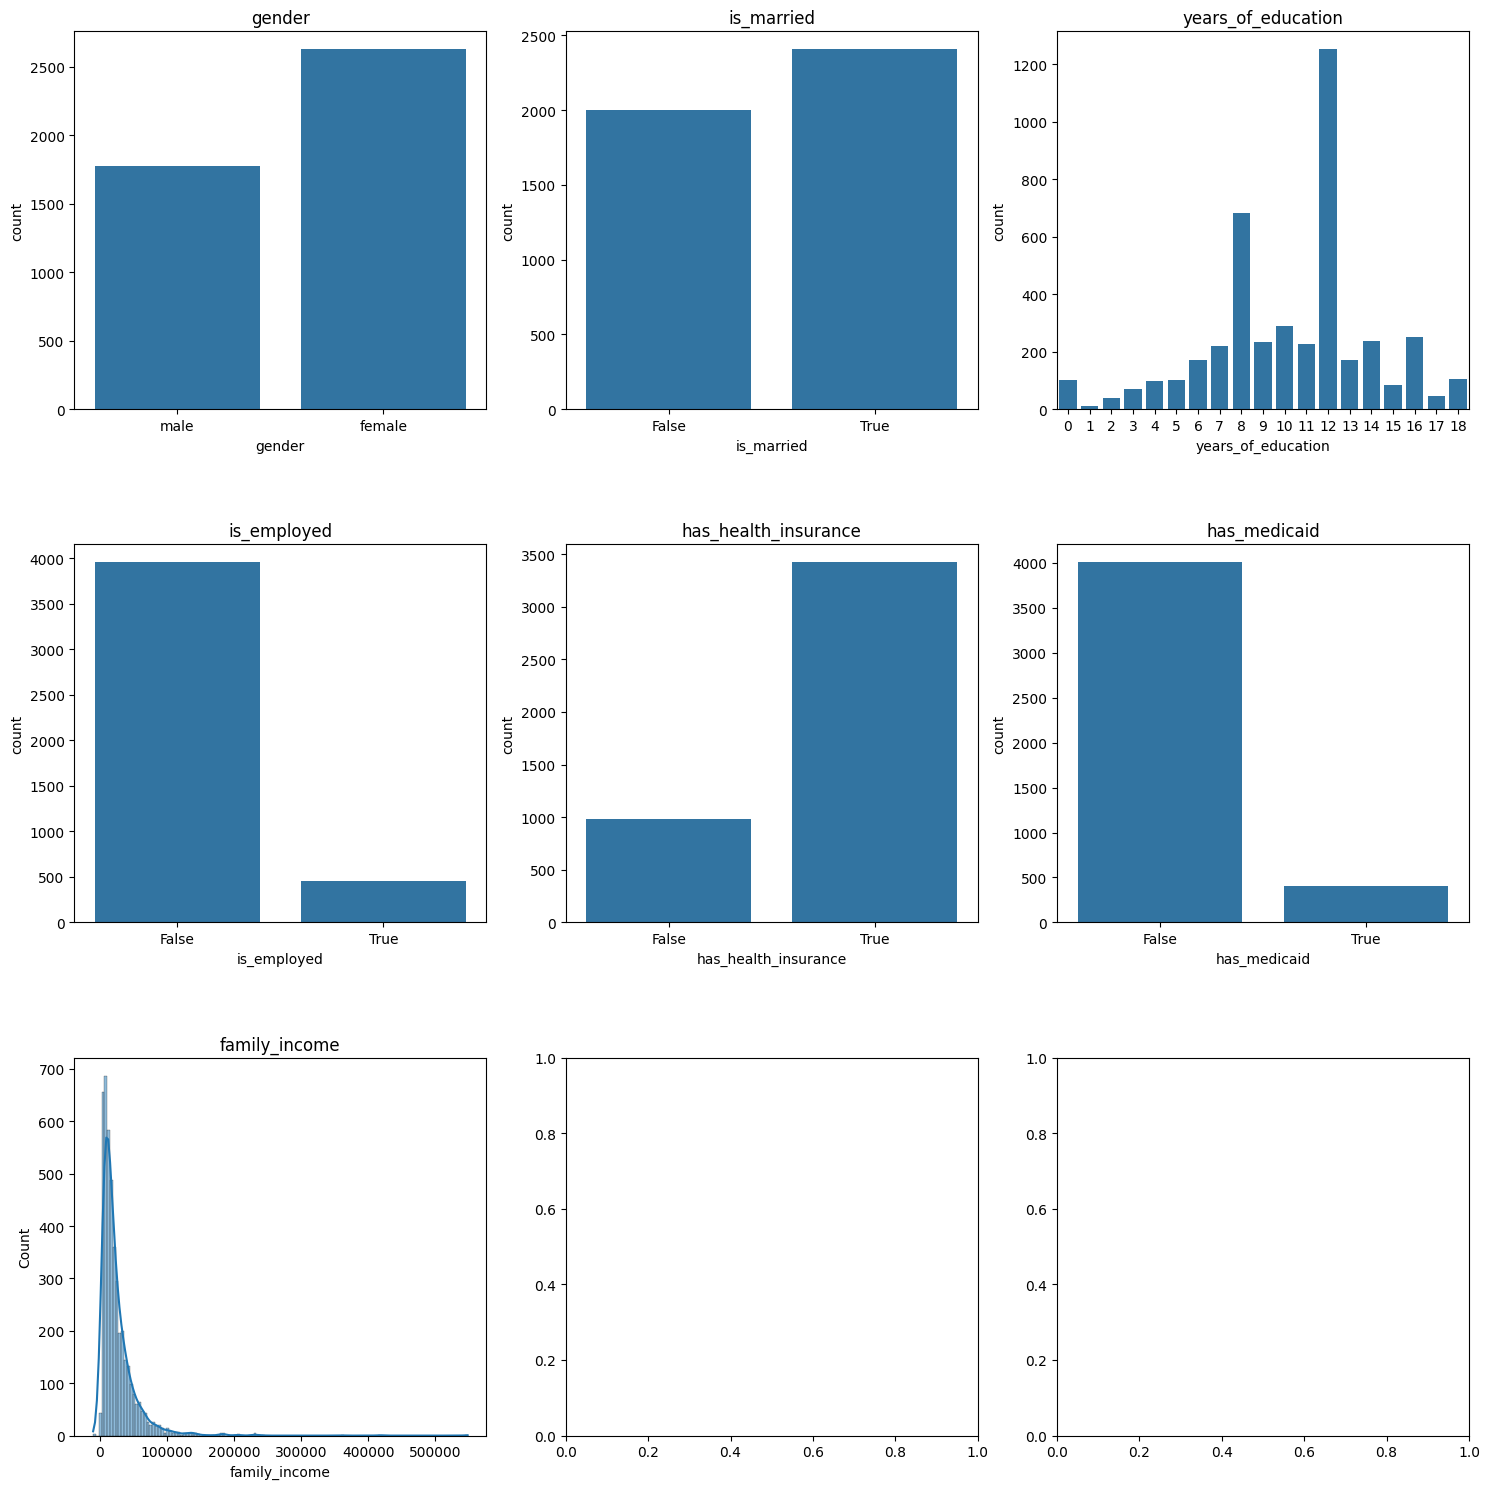

In [504]:
# The columns we want to plot:
columns_to_plot = [ 'gender' ,
                    'is_married' ,
                    'years_of_education' ,
                    'is_employed' ,
                    'has_health_insurance' ,
                    'has_medicaid']

n_cols = len(columns_to_plot) + 2
print(f'Number of Columns: {n_cols}')

# I need a 4X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

#sns.countplot(data=df_NSME1988_new, x='gender', ax=axes[0])

#Iterate over each numeric column and plot a historgram
for i, col in enumerate(columns_to_plot):
    
    sns.countplot(data=df_NSME1988_new, x=col, ax=axes[i])
    axes[i].set_title(col)

i+=1
sns.histplot(data=df_NSME1988_new, x='family_income', ax=axes[i], kde=True)    
axes[i].set_title('family_income')

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    

In [505]:
print('Min - Max - Mode Visits')
col = 'years_of_education'
print(f'{col} Min: {df_NSME1988_new[col].min()} Max: {df_NSME1988_new[col].max()} Mode: {df_NSME1988_new[col].mode()}')
col = 'family_income'
print(f'{col} Min: {df_NSME1988_new[col].min()} Max: {df_NSME1988_new[col].max()} Mode: {df_NSME1988_new[col].mode()}')
print()
print()

Min - Max - Mode Visits
years_of_education Min: 0 Max: 18 Mode: 0    12
Name: years_of_education, dtype: int8
family_income Min: -10125 Max: 548351 Mode: 0    4320
Name: family_income, dtype: int64




##### Analysis of remaining requested columns ####
    Gender - relatively balanced distribution, more women than men
    Married - relatively balanced distribution, more yes than no
    Years of Education - hard to read based on plot. Looks like it almost wants to be normal distibution but kind of looks right skewed
    Employed - There seems to be a lot more unemployed than employed people in this data set (by a large margin 40 - 5 ratio)
    Has Health Insurance - Most people have health insurance by a large margin (~3.5X as many people have health insurance than not)
    Had Medicaid - Most people have do not have medicaid by a large margin (~8X as many people do not have medicaid)
    Family Income - Definite right (positive) skew to the data


    Central Mean Tendency: 
        years_of_education Min: 0 Max: 18 Mode: 12
        family_income Min: -10125 Max: 548351 Mode: 4320

    Family income definitely has outlier (bad) data with substantial negative income
    

    

##### Distribution of Patient Visit Types - occurances of each type #####

{'physician_office_visits': np.int64(25442), 'nonphysician_office_visits': np.int64(7129), 'physician_outpatient_visits': np.int64(3052), 'nonphysician_outpatient_visits': np.int64(2106), 'emergency_room_visits': np.int64(1161), 'number_of_hospital_stays': np.int64(1304)}


C:\Users\jxbma\AppData\Local\Temp\ipykernel_37412\3893749027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(total_visits.keys()), y=list(total_visits.values()), palette='viridis')


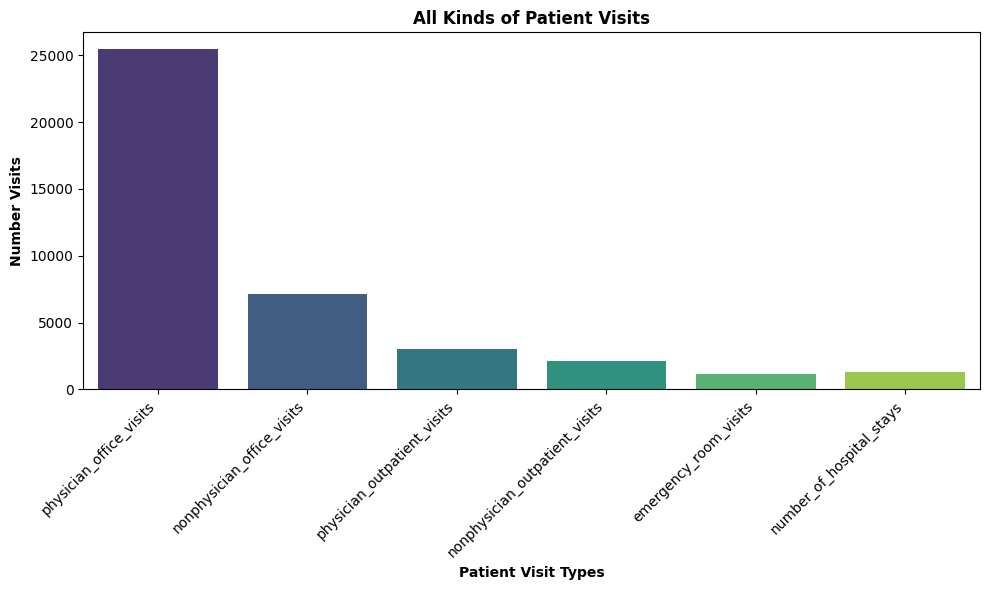

In [506]:
total_visits = { 'physician_office_visits' : df_NSME1988_new['physician_office_visits'].sum(),
                 'nonphysician_office_visits' : df_NSME1988_new['nonphysician_office_visits'].sum(),
                 'physician_outpatient_visits' : df_NSME1988_new['physician_outpatient_visits'].sum(),
                 'nonphysician_outpatient_visits' : df_NSME1988_new['nonphysician_outpatient_visits'].sum(),
                 'emergency_room_visits': df_NSME1988_new['emergency_room_visits'].sum(),
                 'number_of_hospital_stays' : df_NSME1988_new['number_of_hospital_stays'].sum()}

print(total_visits)

plt.subplots(figsize=(10, 6))


# Title and Label axes
plt.title(f'All Kinds of Patient Visits', fontweight='bold')
plt.xlabel('Patient Visit Types', fontweight='bold')
plt.ylabel('Number Visits', fontweight='bold')
plt.xticks(rotation=45, ha='right')

sns.barplot(x=list(total_visits.keys()), y=list(total_visits.values()), palette='viridis')

plt.tight_layout(h_pad=3)
plt.show()

##### Analysis of different patient visits ####
    I wanted to take a look at the different kinds of medical visits and see if I could spot any trends.
    The highest number of visits is for Physician Office Visits. After that numbers fall off dramatically.
    The next higest is Nonphysician office visits. As we progress through the other types of medical visits,
    there is a much tighter range in the counts. The differences between the visit types become much smaller.
    The smallest number of actual provider visits is Emergency Room Visits. I added Hospital Visits so I 
    could see what those numbers look like. In totality, the smallest number of overall "medical visits" is
    Hospital Stays, which is kind of expected.
    

    

#### Create Crosstabs for Requested Distributions ####

age_group: age_group
66-70    1568
71-75    1266
76-80     846
81-85     479
86+       247
Name: count, dtype: int64

gender: gender
female    2628
male      1778
Name: count, dtype: int64
overall_health_factor: overall_health_factor
average      3509
poor          554
excellent     343
Name: count, dtype: int64

gender: gender
female    2628
male      1778
Name: count, dtype: int64
income_category: income_category
10-25k     1682
<10k       1229
25-50k      973
50-100k     406
100k+        95
Name: count, dtype: int64

gender: gender
female    2628
male      1778
Name: count, dtype: int64
region: region
other        1614
midwest      1157
northeast     837
west          798
Name: count, dtype: int64

income_category: income_category
10-25k     1682
<10k       1229
25-50k      973
50-100k     406
100k+        95
Name: count, dtype: int64
age_group: age_group
66-70    1568
71-75    1266
76-80     846
81-85     479
86+       247
Name: count, dtype: int64

income_category: income_category

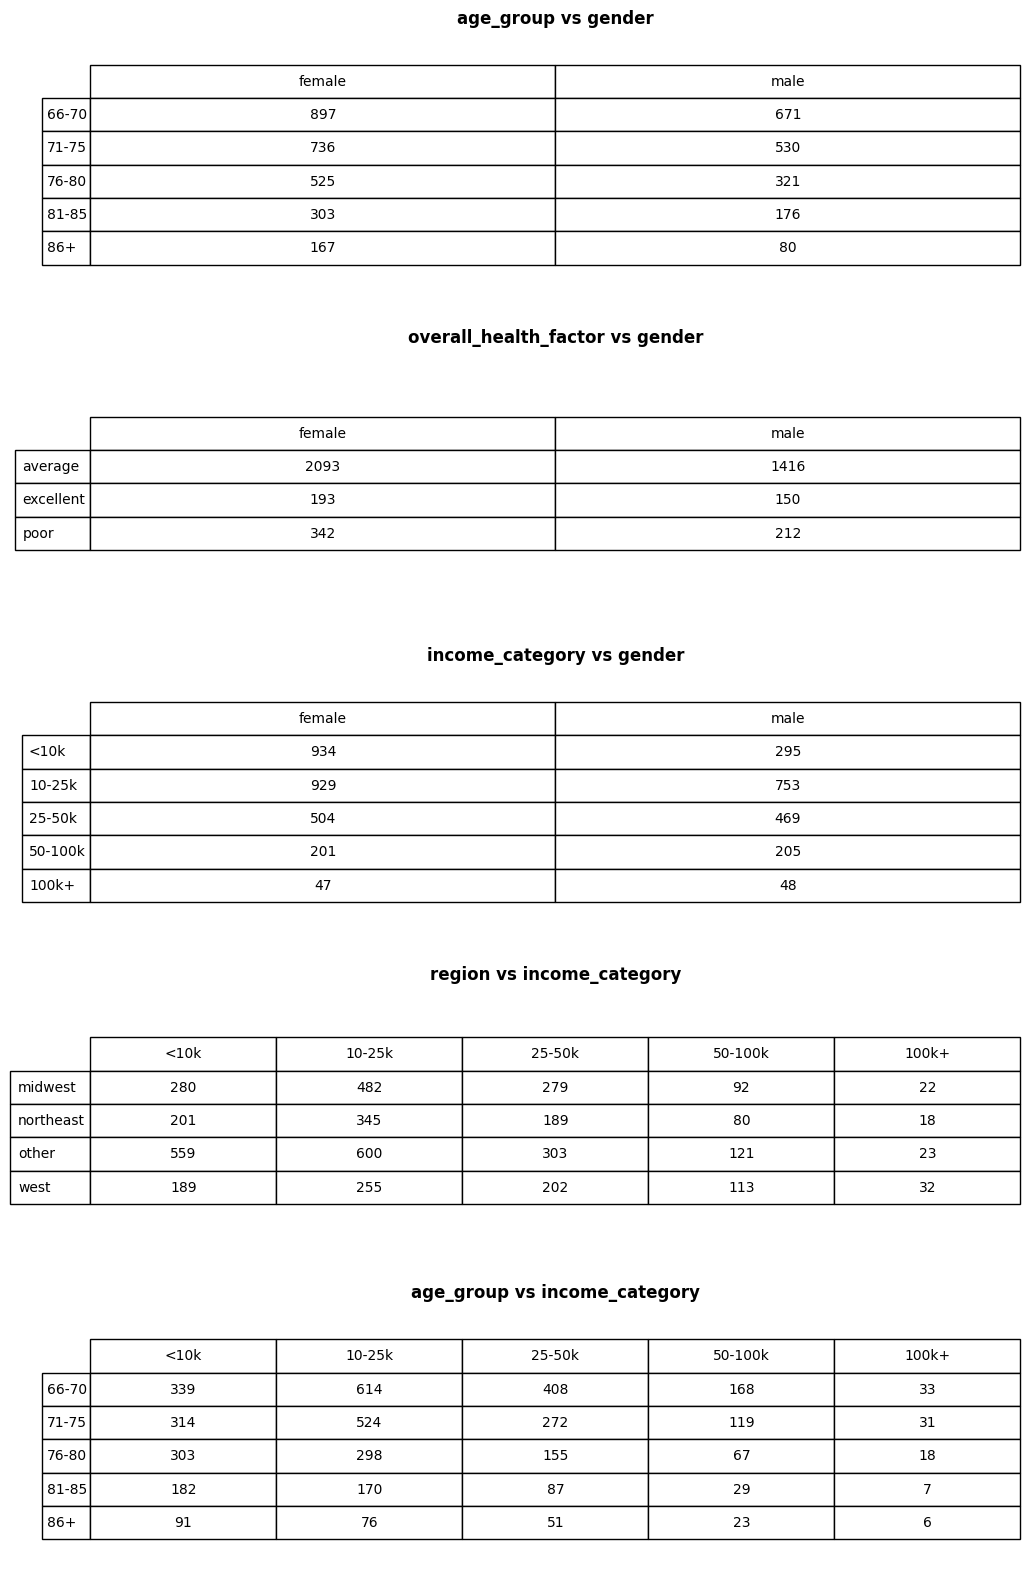

In [507]:

# Performance was horrible with family_income, trying to bin it instead
# Create income categories instead of raw values
# Bin Ages as well for cleaner display
df_NSME1988_new['income_category'] = pd.cut(
    df_NSME1988_new['family_income'], 
    bins=[0, 10000, 25000, 50000, 100000, 1000000],
    labels=['<10k', '10-25k', '25-50k', '50-100k', '100k+']
)

df_NSME1988_new['age_group'] = pd.cut(
    df_NSME1988_new['age'],
    bins=[65, 70, 75, 80, 85, 120],
    labels=['66-70', '71-75', '76-80', '81-85', '86+']
)

# Distributions
features = [ 
    ('age_group', 'gender'),
    ('overall_health_factor', 'gender'),
    ('income_category', 'gender'),
    ('region', 'income_category'),
    ('age_group', 'income_category')
]
features_with_crosstabs = []

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
axes = axes.flatten()
i = 0

for feature1, feature2 in features:

    feature1_counts = df_NSME1988_new[feature1].value_counts()
    feature2_counts = df_NSME1988_new[feature2].value_counts()
    print(f'{feature1}: {feature1_counts}')
    print()
    print(f'{feature2}: {feature2_counts}')

    # Create crosstab
    ct = pd.crosstab(df_NSME1988_new[feature1], df_NSME1988_new[feature2])
    features_with_crosstabs.append((feature1, feature2, ct))

    axes[i].axis('tight')
    axes[i].axis('off')

    # Create table
    table = axes[i].table(cellText=ct.values, 
                          rowLabels=ct.index, 
                          colLabels=ct.columns,
                          cellLoc='center',
                          loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)  # Adjust cell height

    axes[i].set_title(f'{feature1} vs {feature2}', fontsize=12, fontweight='bold')
    i +=1


plt.show()

#### Heat Maps (plots) of Requested Distributions ####

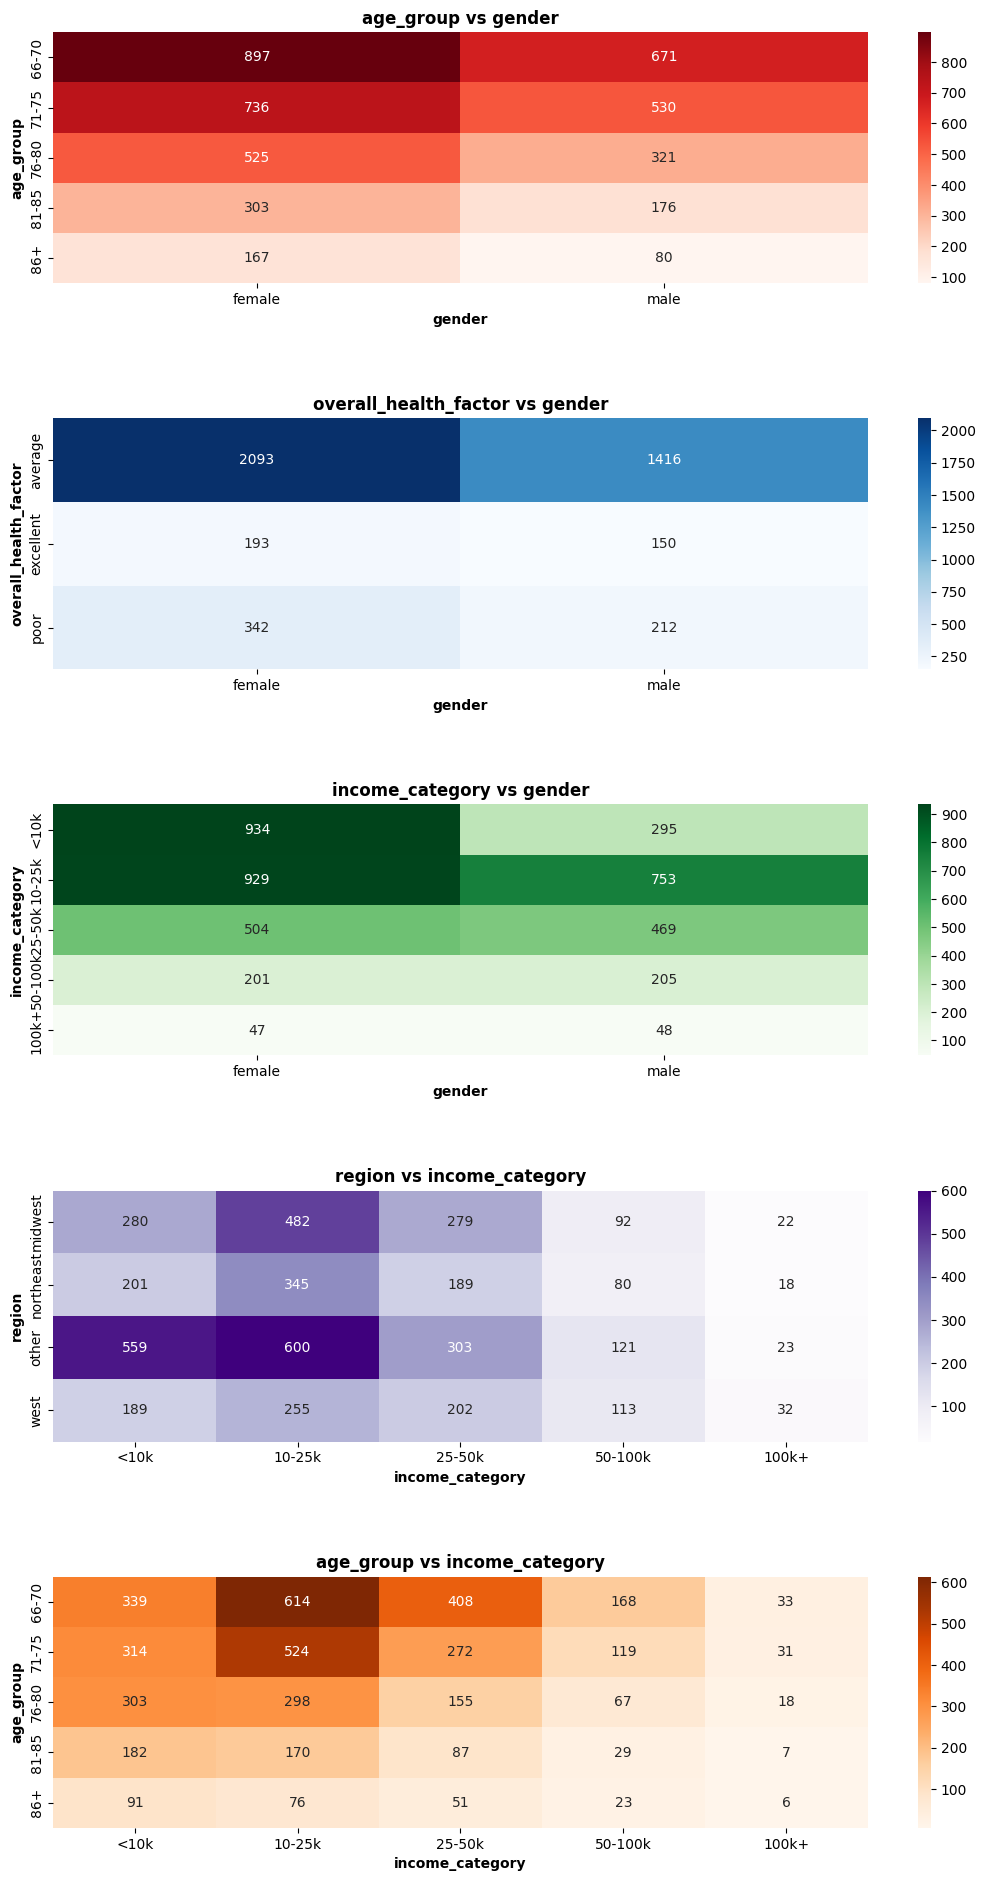

In [508]:

colors = ['Reds', 'Blues', 'Greens', 'Purples', 'Oranges']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
axes = axes.flatten()
i = 0

for feature1, feature2, ct in features_with_crosstabs:

    sns.heatmap(ct, annot=True, fmt='d', cmap=colors[i], ax=axes[i])

    # Title and Label axes
    axes[i].set_title(f'{feature1} vs {feature2}', fontweight='bold')
    axes[i].set_xlabel(f'{feature2}', fontweight='bold')
    axes[i].set_ylabel(f'{feature1}', fontweight='bold')

    i += 1

plt.tight_layout(pad=5) 
plt.show()

### Averages Calculations ###

In [509]:
print('Average Salaries of Men and Women')

avg_income_by_gender = df_NSME1988_new.groupby('gender')['family_income'].mean()

for gender, avg in avg_income_by_gender.items():
    print(f"{gender.capitalize()}: ${avg:,.2f}")

# Calculate the gap
female_avg = avg_income_by_gender['female']
male_avg = avg_income_by_gender['male']

print(f"\nIncome gap: ${male_avg - female_avg:,.2f}")
print(f"Male income is {(male_avg/female_avg - 1)*100:.1f}% higher")
print()
print('--------------------------------------------------------------------')
print()

print('Average Salaries Across Regions')

avg_income_by_region = df_NSME1988_new.groupby('region')['family_income'].mean()

for region, avg in avg_income_by_region.items():
    print(f'"{region}": "${avg:,.2f}"')

print()
print('--------------------------------------------------------------------')
print()

print('Average Salaries Across Age Ranges')

avg_income_by_region = df_NSME1988_new.groupby('age_group')['family_income'].mean()

for age_group, avg in avg_income_by_region.items():
    print(f'"{age_group}": "${avg:,.2f}"')


Average Salaries of Men and Women
Female: $22,493.48
Male: $29,377.16

Income gap: $6,883.68
Male income is 30.6% higher

--------------------------------------------------------------------

Average Salaries Across Regions
"midwest": "$25,136.34"
"northeast": "$26,797.09"
"other": "$21,662.84"
"west": "$31,165.05"

--------------------------------------------------------------------

Average Salaries Across Age Ranges
"66-70": "$27,488.76"
"71-75": "$26,194.35"
"76-80": "$22,997.60"
"81-85": "$20,269.47"
"86+": "$23,951.36"


C:\Users\jxbma\AppData\Local\Temp\ipykernel_37412\1941309176.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_region = df_NSME1988_new.groupby('age_group')['family_income'].mean()


### Bivariate Analysis of Requested Feature Relationships ###
    Intially I tried running the bivariate analysis against the raw data. </br>
    I ran into several issues:</br>
        - Performance was horribly slow</br>
        - Results weren't exactly clear and difficult to read</br>
        - It was challenging to identify trends in the relationships just based on the crosstab tables</br>

    Resolutions:</br>
        - The worst offender for performance/visibility was Income. To rectify the issue, I binned the data into</br>
        categories (income ranges). This sped up performance dramatically and made the results easier to examine.</br>
        I used the same strategy with age. </br>
        - I still had issues identifying trends. Being a visual person, I plotted the bivariate feature relationships into</br>
        Heat Maps. This made the trends much easier to see at a glance. From that I was able to go back to the crosstab</br>
        tables see the exact numbers in the relationships.

##### <u>Age Group versus Gender</u> #####
    - Most people are in the 66-80 age range
    - The 86+ age group has the fewest number of people
    - The highest concentration is women between the ages of 66 and 75
    - The highest gender-age group is women in the 66-79 ag range
    - There are more women than men in the sample
    - Not sure if this is due to women living longer  (total assumption) or more women seek medical attention than men (another assumption)
    - Other factors might be involved - how were the samples collected?

##### <u>Overall Health versus Gender</u> #####
    - Based on the heatmap, you can clearly see most people across both genders (individually and combined) are in "average" health
    - The highest concetration is women in average health (2093)
    - More people (men and women) report being in poor health than in excellent health
    - Surprising to see that the second highest concentration across both genders (individually and combined) are in "poor" health
    - The trend of average (highest) - poor - excellent (lowest) is consistent across genders
    - The distribution across different categories is consistent across genders (at least roughly proportionally)
    - There are more women than men in the sample (see above)

##### <u>Income Category  versus Gender</u> #####
    - The highest concentration of income category vs gender is women making under $50k
    - Based on this sample women (relative to their gender) make less then men (the lower income ranges have a higher concentration than that of men)
    - Men and women have almost identical concentrations (in terms of pure numbers) in the $50k+ income range (gender parity)
    - Proportionally within their gender, a higher percentage of men are in the $50k+ category (relateve to women)
    - Average salary of men to women
    - There are more women than men in the sample (see above)
    - Average salaries by gender:
        Female: $22,493.48
        Male: $29,377.16
        Income gap: $6,883.68
        Male income is 30.6% higher

##### <u>Region versus Income Category</u> #####
    - Most people across all regions make < $50k
    - The highest income category across all regions is $10k - $25k
    - Fewest people earn > $100k
    - "Other" region has the highest population density across regions
    - There are more women than men in the sample (see above)
    - Average salaries by region:
        "midwest": "$25,136.34"
        "northeast": "$26,797.09"
        "other": "$21,662.84"
        "west": "$31,165.05"

##### <u>Age Group versus Income Category</u> #####
    - The highest concentration of salaries is people 66 - 80 years old making <= $50k
    - Fewest over all people (across age ranges) make >= $100k
    - Income decreases as people age (retirement/fixed incomes?)
    - Youngest age range (66-80) earns the most
    - There are more women than men in the sample (see above)
    - Average salaries by age range:
        "66-70": "$27,488.76"
        "71-75": "$26,194.35"
        "76-80": "$22,997.60"
        "81-85": "$20,269.47"
        "86+": "$23,951.36"
    

### Final Thoughts and Recap ###
    An important thing I learned is that choosing the right visualizations with the correct parameters (scaling, grouping, binning) can go
    a long way in understanding and analyzing data, trends in data and relationships between features. If you choose correctly its easier
    to visually identify patterns in the data.

    Utilizing Health Care Sevices (physician, outpatient, emergency, hospital)
    Most people did not make heavy usage of healthcare services (0 - 1 visits were by far the most common across all services)
    Physician Office visits were the most common.

    The data targeted senior populations, with disproportionate numbers of women compared to men.
    This could be due to:
        - Women living longer than men
        - Some other anamoly such women were disproportionately sampled more than men

    Most people were unemployed (retirees), had health insurance, but no medicaid.

    Income levels decrease as the population ages (due to retirement, fixed income issues or just plain lower paying, less skilled jobs)

    Found some data anamolies (outliers) in family_income and patient visits (data errors? - negative values)
    To limit the effect of the outliers, I used some filtering and scaling techniques